# Subword tokenization algorithms

La tokenisation des sous-mots est couramment utilisée dans de nombreux modèles de langage naturel de pointe, y compris BERT et GPT-3. Il est très efficace pour gérer les mots OOV. Dans cette section, nous allons comprendre en détail le fonctionnement de la tokenisation des sous-mots. Avant d'examiner directement la tokenisation des sous-mots, examinons d'abord la tokenisation au niveau du mot.


Supposons que nous ayons un ensemble de données d'entraînement. Maintenant, à partir de cet ensemble d'entraînement, nous construisons un vocabulaire. Pour construire le vocabulaire, nous divisons le texte présent dans l'ensemble de données par des espaces blancs et ajoutons tous les mots uniques au vocabulaire. Généralement, le vocabulaire se compose de plusieurs mots (jetons), mais juste pour un exemple, supposons que notre vocabulaire se compose uniquement des mots suivants.

$$vocabulary = [game, the, I, played, walked, enjoy]$$

Maintenant que nous avons créé le vocabulaire, nous utilisons ce vocabulaire pour tokeniser l'entrée. Considérons une phrase d'entrée 

[I, play, the, game]


Afin de créer des jetons à partir de cette phrase, nous divisons d'abord la phrase par un espace blanc et obtenons tous les mots de cette phrase. Nous avons donc - 

(I, play, the, game)

Maintenant, nous vérifions si nous avons tous les mots (I, play, the, grame) présents dans le vocabulaire. Puisque tous les mots sont présents dans le vocabulaire, nos tokens finaux pour la phrase donnée seront les suivants.

tokens = [I, played, the, game]




Considérons une autre phrase : "I enjoyed the game". Pour tokeniser la phrase, nous divisons la phrase donnée par un espace blanc et obtenons les mots. Ensuite, nous avons [I, enjoyed, the,game].. Maintenant, nous vérifions si nous avons tous les mots (I, enjoyed, the,game) présents dans le vocabulaire. Nous pouvons observer que nous avons tous les mots présents dans le vocabulaire à l'exception du mot enjoyed. Puisque le mot enjoyed n'est pas présent dans le vocabulaire, nous le remplaçons par un jeton unknown , <UNK>, Ainsi, nos jetons finaux seront les suivants:

tokens = [ I, <UNK>, the, game]


Nous pouvons observer que bien que nous ayons le mot enjoy dans notre vocabulaire, simplement parce que nous n'avions pas le mot exact enjoyed, il est marqué comme un mot inconnu avec le jeton <UNK>. Généralement, nous construisons un vocabulaire énorme avec de nombreux mots, et si un mot rare, c'est-à-dire le mot qui n'est pas présent dans le vocabulaire, entre, alors il sera marqué comme un mot inconnu avec un jeton <UNK>. Cependant, avoir un vocabulaire énorme entraîne des problèmes de mémoire et de performance et il ne peut toujours pas gérer les mots invisibles (mots qui ne sont pas présents dans le vocabulaire)


Existe-t-il une meilleure façon de gérer cela? Oui! C'est là que la tokenisation des sous-mots nous aide. Voyons comment la tokenisation des sous-mots fonctionne avec le même exemple précédent. Nous avons appris que notre vocabulaire se compose des éléments suivants:

vocabulary = [game, the, I, played, walked, enjoy]

Dans la tokenisation des sous-mots, nous divisons les mots en sous-mots. Supposons que nous divisons le mot played en sous-mots [play, ed] et le mot walked en sous-mots [walk, ed]. Après avoir séparé les sous-mots, nous les ajouterons au vocabulaire. Notez que le vocabulaire se compose uniquement de mots uniques. Ainsi, notre vocabulaire se compose désormais des éléments suivants :

$$vocabulary = [game, the, I, play, walk, ed, enjoy]$$



Considérons la même phrase que nous avons vue plus tôt : "I enjoyed the game". Pour symboliser cette phrase, nous divisons la phrase donnée par un espace blanc et obtenons les mots. Nous avons donc [J'ai apprécié le jeu]. Maintenant, nous vérifions si nous avons tous les mots ([ I,enjoyed, the, game]) présents dans le vocabulaire. On peut remarquer que nous avons tous les mots présents dans le vocabulaire à l'exception du mot enjoyed. Puisque le mot enjoyed n'est pas présent dans le vocabulaire, nous le divisons en sous-mots, [enjoy, ed]. Maintenant, nous vérifions si nous avons les sous-mots enjoy et ed présents dans le vocabulaire, et puisqu'ils sont présents dans le vocabulaire, nos jetons deviennent les suivants.

tokens = [ I, enjoy, ##ed, the, game]

On peut observer que le mot ed est précédé de deux dièses. Cela indique que ##ed est un sous-mot et est précédé d'un autre mot. Nous n'ajoutons pas les signes ## pour le sous-mot qui est au début du mot, et c'est pourquoi il n'y a pas de signes ## dans le sous-mot Enjoy. Les signes ## sont ajoutés juste pour indiquer qu'il s'agit d'un sous-mot et que il est précédé d'un autre mot. De cette façon, la tokenisation des sous-mots gère les mots inconnus, c'est-à-dire les mots qui ne sont pas présents dans le vocabulaire.



Mais la question est, nous avons vu que nous avons divisé les mots played  et walked  dans des sous-mots et les avons ajoutés au vocabulaire. Mais pourquoi nous séparons-nous uniquement de ces mots ? Pourquoi pas d'autres mots du vocabulaire ? Comment décidons-nous quels mots diviser et lesquels ne pas diviser ? C'est ici que nous utilisons l'algorithme de tokenisation des sous-mots


Apprenons plusieurs algorithmes de tokenisation de sous-mots intéressants qui sont utilisés pour créer le vocabulaire. Après avoir créé le vocabulaire, nous pouvons l'utiliser pour la tokenisation. Comprenons les trois algorithmes de tokenisation de sous-mots couramment utilisés suivants:

* Byte pair encoding
* Byte-level byte pair encoding
* WordPiece


 

## Byte pair encoding

Comprenons le fonctionnement du Byte Pair Encoding (BPE) à l'aide d'un exemple. Supposons que nous ayons un ensemble de données. Tout d'abord, nous extrayons tous les mots de l'ensemble de données avec leur nombre. Supposons que les mots extraits de l'ensemble de données ainsi que le nombre soient 

(cost, 2), (best, 2), (menu, 1), (men, 1) et (camel, 1).


Maintenant, nous divisons tous les mots en caractères et créons une séquence de caractères. Le tableau suivant montre la séquence de caractères ainsi que le nombre de mots

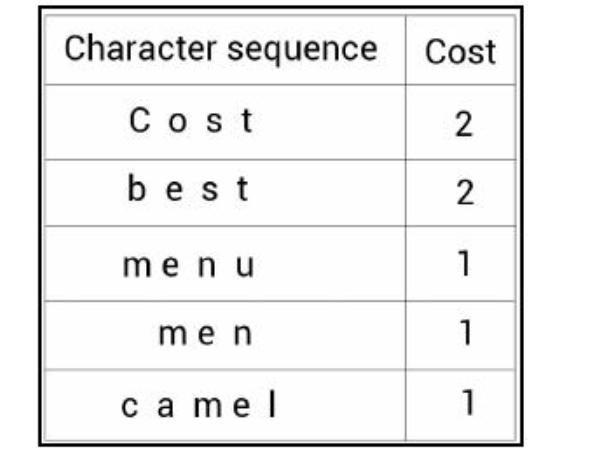

Ensuite, nous définissons une taille de vocabulaire. Supposons que l'on construise un vocabulaire de taille 14. Cela implique que l'on crée un vocabulaire à 14 jetons. Maintenant, comprenons comment créer le vocabulaire en utilisant BPE

Tout d'abord, nous ajoutons tous les caractères uniques présents dans la séquence de caractères au vocabulaire, comme indiqué ici :

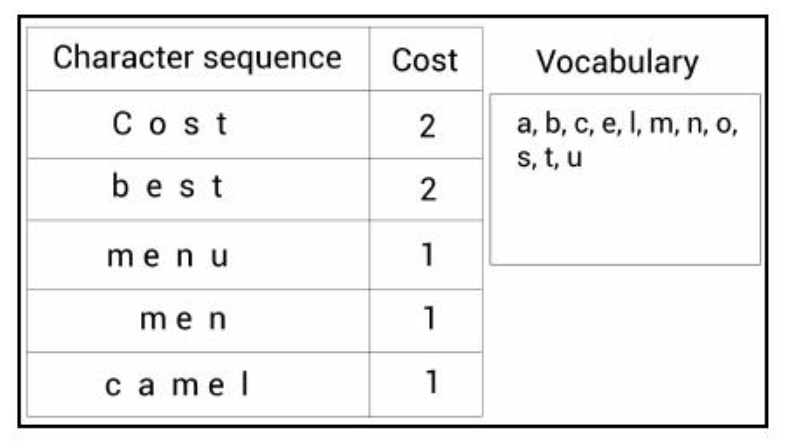

Comme nous pouvons l'observer, la taille de notre vocabulaire est de 11. Voyons maintenant comment ajouter de nouveaux jetons au vocabulaire.

Pour ajouter un nouveau jeton au vocabulaire, nous identifions d'abord la paire de symboles la plus fréquente. Ensuite, nous fusionnons cette paire de symboles la plus fréquente. et l'ajouter au vocabulaire. Nous répétons cette étape de manière itérative jusqu'à ce que nous atteignions la taille du vocabulaire. Comprenons cela en détail.

En regardant la séquence de caractères suivante, nous pouvons observer que la paire de symboles la plus fréquente que nous ayons est s et t puisque la paire de symboles s et t s'est produite quatre fois (deux fois en cost et deux fois en best).

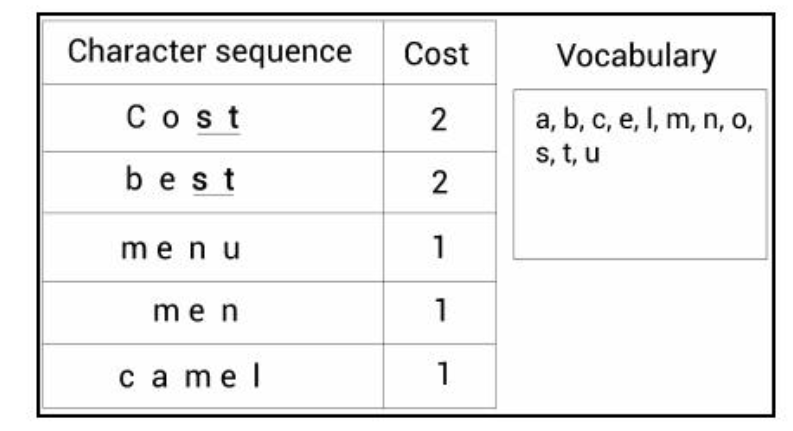

Donc, nous fusionnons les symboles s et t et les ajoutons au vocabulaire, comme indiqué ici :

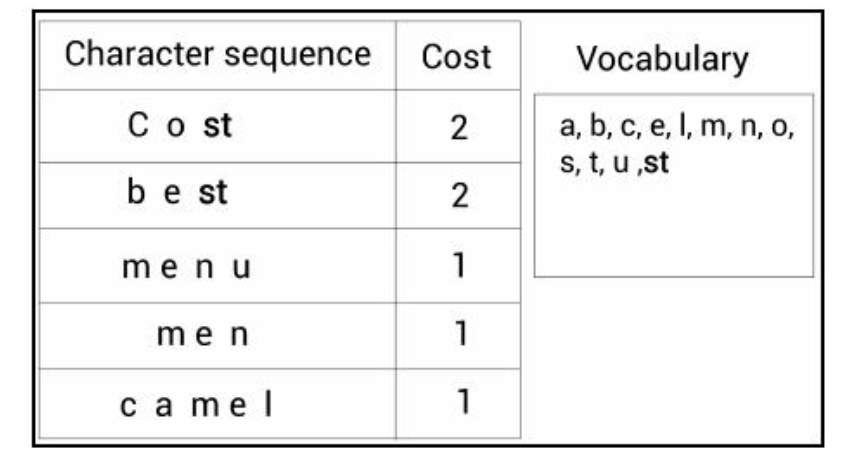

Maintenant, nous répétons la même étape. C'est-à-dire que nous vérifions à nouveau la paire de symboles la plus fréquente. Nous pouvons observer que la paire de symboles la plus fréquente que nous avons maintenant est m et e, car ils se sont produits trois fois 
(une fois dans le menu, une fois en menu et une fois en camel)


Donc, nous fusionnons les symboles m et e et les ajoutons au vocabulaire, comme indiqué ici :


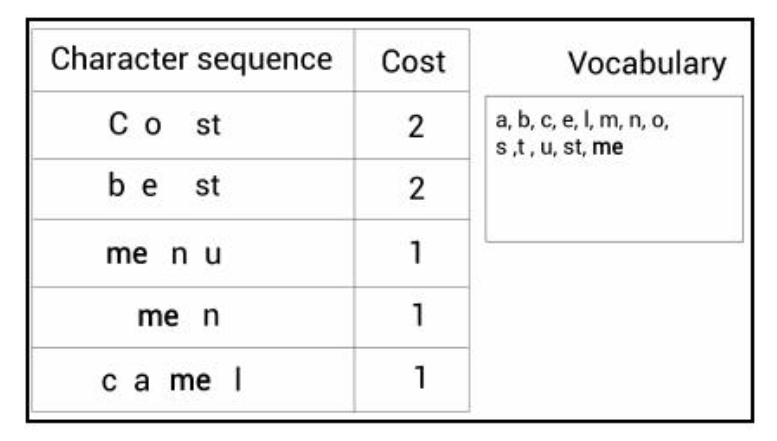

Encore une fois, nous vérifions la paire de symboles la plus fréquente. Nous pouvons observer que la paire de symboles la plus fréquente que nous ayons maintenant est me et n, puisqu'ils se sont produits deux fois (une fois dans menu et une fois dans  men)

Donc, nous fusionnons les symboles me et n et les ajoutons au vocabulaire, comme indiqué ici :

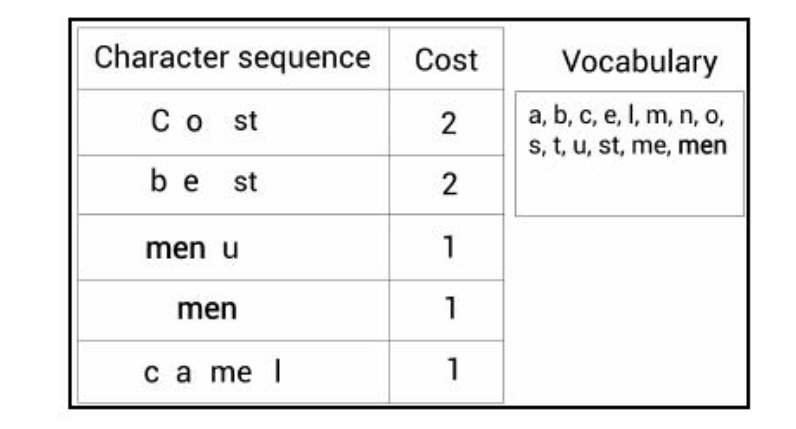

De cette façon, nous répétons cette étape plusieurs fois jusqu'à ce que nous atteignions la taille du vocabulaire. A partir du schéma précédent, nous pouvons observer que maintenant notre vocabulaire a 14 jetons. Puisque, dans cet exemple, nous créons un vocabulaire de taille 14, nous nous arrêtons à cette étape

Ainsi, à partir du jeu de données donné, nous avons construit un vocabulaire contenant 14 tokens

$$vocabulary = {a,b,c,e,l,m,n,o,s,t,u,st,me,men}$$


Les étapes impliquées dans BPE sont fournies ici : 

* 1.  Extraire les mots de l'ensemble de données donné avec leur nombre. 
* 2. Définir la taille du vocabulaire. 
* 3. Diviser les mots en une séquence de caractères. 
* 4. Ajouter tous les caractères uniques de notre séquence de caractères aux  vocabulaire. 
* 5. Sélectionnez et fusionnez la paire de symboles qui a une fréquence élevée.
* 6. Répétez l'étape 5 jusqu'à ce que la taille du vocabulaire soit atteinte.


Nous avons appris à construire le vocabulaire à l'aide de BPE. D'accord, mais comment utiliser ce vocabulaire ? Nous utilisons le vocabulaire pour tokeniser l'entrée donnée. Comprenons ce concept à l'aide de quelques exemples dans la section suivante

## Tokenizing with BPE
Dans la section précédente, nous avons appris qu'avec l'ensemble de données donné, nous avons créé le vocabulaire suivant:

vocabulary = {a,b,c,e,l,m,n,o,s,t,u,st,me,men}

Voyons maintenant comment ce vocabulaire peut être utilisé. Supposons que notre texte d'entrée se compose d'un seul mot - mean. Maintenant, nous vérifions si le mot mean est présent dans notre vocabulaire. Nous pouvons observer qu'il n'est pas présent dans le vocabulaire. Nous avons donc divisé le mot mean en sous-mots [me, an]. Maintenant, on vérifie si les sous-mots sont présents dans le vocabulaire. On peut observer que le sous-mot me est présent dans le vocabulaire, mais le sous-mot an n'est pas présent dans notre vocabulaire. Par conséquent, nous divisons le sous-mot an, donc maintenant nos sous-mots se composent de [me, a, n]. Vérifions maintenant si les caractères a et n sont présents dans notre vocabulaire. Puisqu'ils sont présents dans notre vocabulaire, nos jetons finaux seront les suivants.

tokens = [me,a,n]


Considérons un autre mot d'entrée : bear. On peut observer que le mot bear n'est pas présent dans notre vocabulaire. Alors maintenant, nous le divisons en sous-mots [be, ar]. Maintenant, nous vérifions si les sous-mots be et ar sont présents dans le vocabulaire. Le sous-mot be est présent, mais ar n'est pas présent dans le vocabulaire. Par conséquent, nous divisons le sous-mot ar, et maintenant les sous-mots se composent de [be, a,r]. Vérifions maintenant si les caractères a et r sont présents dans le vocabulaire. On peut observer que a est présent dans le vocabulaire, mais r n'est pas présent dans le vocabulaire. Nous sommes incapables d'effectuer une autre scission puisque maintenant nous n'avons que des characters individuels. Maintenant, nous remplaçons r par un jeton <UNk>. Ainsi, nos jetons finaux seront les suivants.

tokens = [be,a,<UNK>]


Attends. Nous avons appris que BPE gère bien les mots rares, mais nous avons maintenant un jeton <UNk>. En effet, puisqu'il s'agit d'un petit exemple, le caractère r n'est pas présent dans notre vocabulaire. Mais lorsque nous créons un vocabulaire avec un corpus énorme, notre vocabulaire aura tous les caractères.


Considérons un autre mot d'entrée : men. Vérifions maintenant si le mot hommes est présent dans notre vocabulaire. Le mot hommes étant présent dans notre vocabulaire, nous pouvons le renvoyer directement sous forme de token. Ainsi, notre jeton final sera le suivant:

tokens = [men]

De cette façon, nous tokenisons la phrase d'entrée à l'aide de BPE. Maintenant que nous avons compris le fonctionnement de BPE, dans la section suivante, nous examinerons byte-level byte pair encoding



## Byte-level byte pair encoding

Byte-level byte pair encoding (BBPE) est un autre algorithme couramment utilisé. Il fonctionne de manière très similaire à BPE, mais au lieu d'utiliser une séquence au niveau des caractères, il utilise une séquence au niveau des octets. Comprenons comment fonctionne BBPE à l'aide d'un exemple. 


Supposons que notre texte d'entrée se compose uniquement du mot « best ». On sait que dans BPE, on convertit le mot en une séquence de caractères, on aura donc la suite:

Character sequence: b e s t

Alors que dans BBPE, au lieu de convertir le mot en une séquence de caractères, nous le convertissons en séquence au niveau de l'octet. Par conséquent, nous convertissons le mot « best » en une séquence d'octets.

Byte sequence: 62 65 73 74

De cette façon, nous convertissons l'entrée donnée en une séquence au niveau des octets au lieu d'une séquence au niveau des caractères. Chaque caractère Unicode est converti en un octet. Un seul caractère peut avoir de 1 à 4 octets.

Considérons un autre exemple. Supposons que notre entrée se compose d'un mot chinois,Maintenant, au lieu de convertir le mot en une séquence de caractères, nous allons convertir le mot en une séquence au niveau de l'octet. Par conséquent, nous avons ce qui suit:

Byte sequence: e4 bd a0 e5 a5 bd

Comme nous pouvons le constater, nous avons converti le mot d'entrée en une séquence d'octets. De cette manière, nous convertissons le texte donné en une séquence au niveau de l'octet, puis nous appliquons l'algorithme BPE et construisons un vocabulaire en utilisant des paires fréquentes au niveau de l'octet. Mais quel est le but de faire du BPE au niveau de l'octet au lieu du BPE au niveau du caractère ? Eh bien, le BPE au niveau de l'octet sera très utile dans un environnement multilingue. Il est très efficace pour gérer les mots OOV et il est excellent pour partager du vocabulaire dans plusieurs langues


## WordPiece

WordPiece fonctionne de manière similaire à BPE, avec une différence mineure. Nous avons appris que dans BPE, à partir d'un ensemble de données donné, nous extrayons d'abord les mots avec leur nombre. Ensuite, nous divisons les mots en séquences de caractères. Ensuite, nous fusionnons la paire de symboles qui a une fréquence élevée. Nous continuons ensuite à fusionner les paires de symboles avec une fréquence élevée de manière itérative jusqu'à ce que nous atteignions la taille du vocabulaire. Nous faisons la même chose dans WordPiece, à la différence près qu'ici nous ne fusionnons pas les paires de symboles en fonction de la fréquence. Au lieu de cela, nous fusionnons des paires de symboles en fonction de la probabilité. Ainsi, nous fusionnons la paire de symboles qui a une forte probabilité du modèle de langage, qui est entraîné sur les données d'apprentissage. Comprenons cela à l'aide d'un exemple


Considérons le même exemple que nous avons utilisé dans la section BPE.

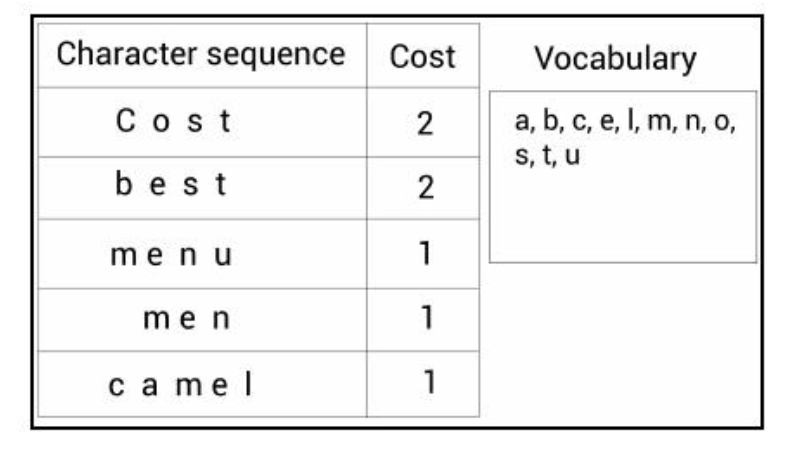




Nous avons appris que dans BPE, nous fusionnons la paire de symboles la plus fréquente. Dans BPE, nous avons fusionné la paire de symboles s et t puisqu'ils se sont produits quatre fois. Mais maintenant, dans cette méthode, nous ne fusionnons pas les paires de symboles en fonction de la fréquence ; au lieu de cela, nous les fusionnons en fonction de la probabilité. Tout d'abord, nous vérifions la vraisemblance du modèle de langage (qui est entraîné sur un ensemble d'apprentissage donné) pour chaque paire de symboles. Ensuite, nous fusionnons la paire de symboles qui a la probabilité la plus élevée. La vraisemblance de la paire de symboles s et t est calculée, comme indiqué ici :

$$\frac{p(st)}{p(s)p(t)}$$


Si la probabilité est élevée, nous fusionnons simplement la paire de symboles et les ajoutons au vocabulaire. De cette façon, nous calculons la vraisemblance de toutes les paires de symboles et fusionnons celle qui a la vraisemblance maximale et l'ajoutons au vocabulaire. Les étapes suivantes nous aident à mieux comprendre l'algorithme : 

* 1. extraire les mots de l'ensemble de données donné ainsi que leur nombre.

* 2. définir la taille du vocabulaire.

* 3.diviser les mots en une séquence de caractères.

* 3.ajouter tous les caractères uniques dans notre séquence de caractères au vocabulaire. 

* 4.Construisez le modèle linguistique sur l'ensemble de données donné (ensemble d'apprentissage).

* 5. Sélectionnez et fusionnez la paire de symboles qui a la probabilité maximale du modèle langage formé sur l'ensemble d'apprentissage.

* 7. Répétez l'étape 6 jusqu'à ce que la taille du vocabulaire soit atteinte. 

Après avoir construit le vocabulaire, nous l'utilisons pour la tokenisation. Supposons que ce qui suit soit le vocabulaire que nous avons construit à l'aide de la méthode WordPiece :

vocabulary = {a,b,c,e,l,m,n,o,s,t,u,st,me}

Supposons maintenant que notre texte d'entrée se compose d'un seul mot -stem. On peut observer que le mot stem n'est pas présent dans notre vocabulaire. Alors maintenant, nous le divisons en sous-mots [st,##em]. Maintenant, nous vérifions si les sous-mots st et em sont présents dans le vocabulaire. Le sous-mot st est présent, mais em ne l'est pas. Par conséquent, nous divisons le sous-mot em, et maintenant les sous-mots se composent de [st, ##e,##m]. Vérifions maintenant si les caractères e et m sont présents dans le vocabulaire. Puisqu'ils sont présents dans le vocabulaire, nos jetons finaux seront les suivants :

tokens = [st, ##e, ##m]

de cette façon, nous pouvons créer un vocabulaire en utilisant l'algorithme de tokenisation du sous-mot WordPiece et utiliser le vocabulaire pour la tokenisation.
